# Model organic aerosol ratios

## Goal: Calculate the ration oa / (oa + so4 + bc) for both CESM2 and NorESM

### Plot the ratios for both models using an Arctic Projection, then plot the difference between them 

Check for a significant trend in the relative bias of this value between the values. Sample at the Arctic observatories used previously

In [65]:
from imports import (
        pd, np, xr, mpl, plt, sns, os,
        glob, datetime, sys, crt, LogNorm
    )
#import cartopy.crs as ccrs
ccrs = crt.crs

#from functions import 
base_dir = '/home/notebook/basics/saved_data/'

1. Calculate monthly averages for the three aerosol constituents in CESM2 for the time period 1860-1880.

collect file paths for CESM2-WACCM:

In [2]:
mmroa_path = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmroa_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
mmrso4_path = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrso4_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
mmrbc_path = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrbc_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'

# Potentially to use later :
mmrnh4_path = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrnh4_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'
mmrdust_path = '~/shared-cmip6-for-ns1000k/historical/CESM2-WACCM/r1i1p1f1/mmrdust_AERmon_CESM2-WACCM_historical_r1i1p1f1_gn_185001-201412.nc'

Dictionary to reference data objects:

In [3]:
data_paths = {'mmroa':[mmroa_path],
              'mmrso4':[mmrso4_path],
              'mmrbc':[mmrbc_path]}

In [3]:
data_paths = {'mmroa':[mmroa_path],
              'mmrso4':[mmrso4_path],
              'mmrbc':[mmrbc_path],
              'mmrnh4_path':[mmrnh4_path],
              'mmrdust_path':[mmrdust_path]}

Save data for each variable for the lowest level of the atmosphere, and for the appropriate time step within 'data_paths'

In [75]:
cesm_all = xr.Dataset()
vals = data_paths.keys()
print('Processing...')
for i in vals: # for each GCM variable of interest
    temp_data = xr.open_dataset(data_paths[i][0])  # open the dataset
    surface_val = temp_data[i].isel(lev=69, time=slice(120,360)) # select the data at the surface from 1860-1880
    monthly = surface_val.groupby('time.month').mean() # Create monthly averages, slow step
    data_paths[i].append(monthly)
    cesm_all[i] = monthly
    print(i)

Processing...


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmroa' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmroa


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmrso4' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmrso4


/opt/conda/lib/python3.7/site-packages/xarray/conventions.py:494: SerializationWarning: variable 'mmrbc' has multiple fill values {1e+20, 1e+20}, decoding all values to NaN.
  use_cftime=use_cftime,


mmrbc


Sum aerosol contributions from oa, so4, and bc

In [41]:
cesm_july_oa = data_paths['mmroa'][1].isel(month = 6) # Select July, equivalent to data_paths['mmroa'][1][6,:,:]

cesm_july_all = 0;
for source in data_paths:
    cesm_july = data_paths[source][1].isel(month = 6) # Select July, equivalent to data_paths['mmroa'][1][6,:,:]
    cesm_july_all += cesm_july

In [42]:
cesm2_ratio = cesm_july_oa / cesm_july_all


In [43]:
cesm2_ratio.name = 'cesm_aero_ratio'

In [44]:
cesm2_ratio.to_netcdf(path = '~/basics/saved_data/aerosolratio_cesm2.nc')

Text(0.5,1,'CESM2-WACCM')

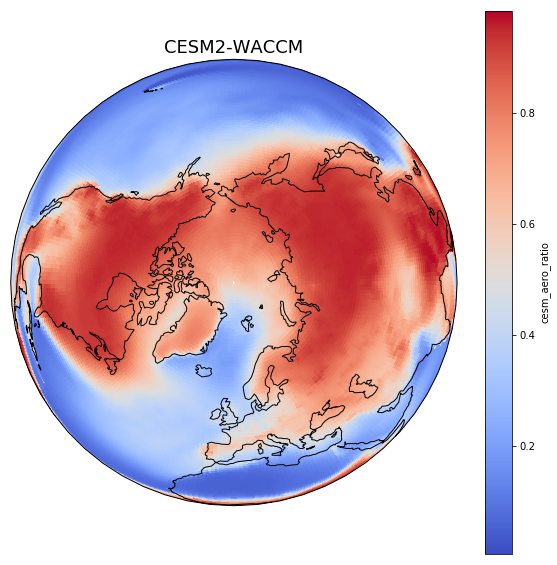

In [69]:
fig = plt.figure(1, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
cesm2_ratio.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='coolwarm')

# One way to customize your title
plt.title('CESM2-WACCM', fontsize=18)

In [70]:
filename = "cesm2_aero_ratio_polar"
fig.savefig(base_dir + filename  + '.pdf')
fig.clf()

In [46]:
mmroa_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmroa_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_186001-186912.nc'
mmroa_path2 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmroa_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_187001-187912.nc'
mmrso4_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrso4_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_186001-186912.nc'
mmrso4_path2 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrso4_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_187001-187912.nc'
mmrbc_path1 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrbc_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_186001-186912.nc'
mmrbc_path2 = '~/shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrbc_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_187001-187912.nc'
mmrss_path1 = 'shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrss_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_186001-186912.nc'
mmrss_path2 = 'shared-cmip6-for-ns1000k/historical/NorESM2-LM/r1i1p1f1/mmrss_AERmon_NorESM2-LM_historical_r1i1p1f1_gn_187001-187912.nc'

In [47]:
data_paths2 = {'mmroa':[mmroa_path1, mmroa_path2],
              'mmrso4':[mmrso4_path1,mmrso4_path2],
              'mmrbc':[mmrbc_path1,mmrbc_path2]}

Collect file paths for NorESM2-LM:

In [73]:
noresm_all = xr.Dataset()
vals = data_paths2.keys()
print('Processing...')
for i in vals: # for each GCM variable of interest
#    print(data_paths2[i][0], data_paths2[i][1])
    temp_data1 = xr.open_dataset(data_paths2[i][0])  # open the dataset 1860-1870
    temp_data2 = xr.open_dataset(data_paths2[i][1])  # open the dataset 1870-1880
    _t1 = temp_data1[i].isel(lev=0)#, time=slice(120,360)) # select the data at the surface from 1860-1880
    _t2 = temp_data2[i].isel(lev=0)#, time=slice(120,360)) # select the data at the surface from 1860-1880
#    net_surface_val = xr.concat([_t1,_t2], dim = 'time')
    monthly = _t1.groupby('time.month').mean() # Create monthly averages, slow step
#    monthly = net_surface_val.groupby('time.month').mean() # Create monthly averages, slow step
    data_paths2[i].append(monthly)
    noresm_all[i] = monthly
    
    print(i)

Processing...
mmroa
mmrso4
mmrbc


In [49]:
july_oa = data_paths2['mmroa'][-1].isel(month=6)
july_sum = 0
for i in data_paths2:
#    print(i, data_paths2[i][0])
    july_sum += data_paths2[i][-1].isel(month=6)
noresm_ratio = july_oa / july_sum

In [50]:
noresm_ratio.name = 'aero_ratio'

In [51]:
noresm_ratio.to_netcdf(path = '~/basics/saved_data/aerosolratio_noresm.nc')

In [157]:
mmrso4_hardcode = data_paths2['mmrso4'][-1].isel(month=6)
mmroa_hardcode = data_paths2['mmroa'][-1].isel(month=6)
mmrbc_hardcode = data_paths2['mmrbc'][-1].isel(month=6)

noresm_ratio_hardcode = mmroa_hardcode / (mmroa_hardcode + mmrso4_hardcode + mmrbc_hardcode)

Text(0.5,1,'NorESM-ML')

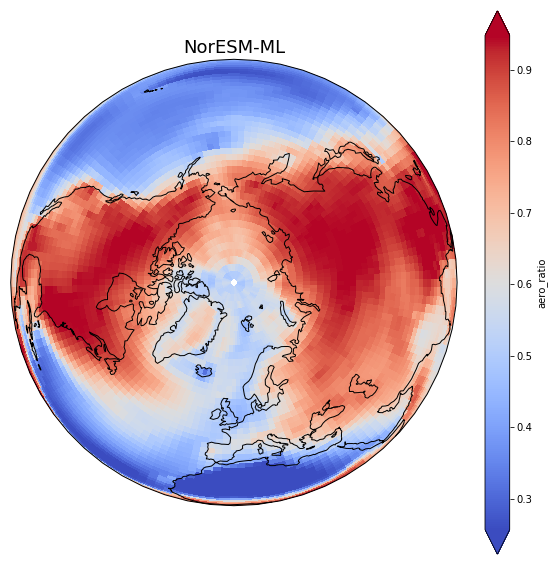

In [52]:
fig2 = plt.figure(2, figsize=[10,10])

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax2 = plt.subplot(1, 1, 1, projection=ccrs.Orthographic(0, 90))
ax2.coastlines()

# We need to project our data to the new Orthographic projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
#noresm_ratio.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='coolwarm', robust=True)
noresm_ratio.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='coolwarm', robust=True)
#noresm_july_oa.plot(ax=ax2, transform=ccrs.PlateCarree(), cmap='coolwarm', robust=True)

# One way to customize your title
plt.title('NorESM-ML', fontsize=18)

In [71]:
filename = "noresm_aero_ratio_polar"
fig2.savefig(base_dir + filename  + '.pdf')
fig2.clf()

In [47]:
noresm_ratio
noresm_july_oa
noresm_july_all

<xarray.DataArray 'mmroa' (lat: 96, lon: 144)>
array([[1.7870435e-14, 1.7870435e-14, 1.7870435e-14, ..., 1.7870435e-14,
        1.7870435e-14, 1.7870435e-14],
       [1.4762449e-14, 1.4687766e-14, 1.4625355e-14, ..., 1.5049419e-14,
        1.4942320e-14, 1.4846782e-14],
       [1.5108974e-14, 1.5007106e-14, 1.4931627e-14, ..., 1.5582492e-14,
        1.5401166e-14, 1.5241502e-14],
       ...,
       [4.5435230e-14, 4.5414315e-14, 4.5393333e-14, ..., 4.5457565e-14,
        4.5455810e-14, 4.5449914e-14],
       [4.6226816e-14, 4.6246762e-14, 4.6269449e-14, ..., 4.6180914e-14,
        4.6194466e-14, 4.6209483e-14],
       [4.6741741e-14, 4.6741741e-14, 4.6741741e-14, ..., 4.6741741e-14,
        4.6741741e-14, 4.6741741e-14]], dtype=float32)
Coordinates:
    lev      float64 0.003643
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    month    int64 7

In [54]:
obs_dict = {'Zeppelin': [78.907206, 11.885593]}

In [57]:
#cesm_july_oa / cesm_july_all
temp_coords = obs_dict['Zeppelin'] # Get the coordinates
oa_zepp_july_noresm_mmr = july_oa.sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
oa_zepp_july_cesm_mmr = cesm_july_oa.sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
oa_zepp_july_noresm_density = oa_zepp_july_noresm_mmr * 1.25 * 1e9
oa_zepp_july_cesm_density = oa_zepp_july_cesm_mmr * 1.25 * 1e9
print(oa_zepp_july_noresm_density, oa_zepp_july_cesm_density)

<xarray.DataArray 'mmroa' ()>
array(0.15074598)
Coordinates:
    lev      float64 0.9926
    lat      float64 78.63
    lon      float64 12.5
    month    int64 7 <xarray.DataArray 'mmroa' ()>
array(0.04953769)
Coordinates:
    lat      float64 78.69
    lev      float64 -992.6
    lon      float64 12.5
    month    int64 7


In [ ]:
mmrso4_hardcode = data_paths2['mmrso4'][-1].isel(month=6)
mmroa_hardcode = data_paths2['mmroa'][-1].isel(month=6)
mmrbc_hardcode = data_paths2['mmrbc'][-1].isel(month=6)

## Observational Data:
Average for Julys 2006-08:

    From Olga:
    OA: 0.088402 [$$\mu g / m^3$$]
    BC: 0.007601 [$$\mu g / m^3$]
    
    From Dina:
    SO4: 0.23671 [$$\mu g / m^3$$]
    Sea salt: 0.39034 [$$\mu g / m^3$$]

In [78]:
noresm_all

<xarray.Dataset>
Dimensions:  (lat: 96, lon: 144, month: 12)
Coordinates:
    lev      float64 0.9926
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
  * lon      (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mmroa    (month, lat, lon) float32 8.609871e-12 ... 7.372073e-13
    mmrso4   (month, lat, lon) float32 2.4217097e-11 ... 1.2145864e-12
    mmrbc    (month, lat, lon) float32 6.10334e-15 ... 2.6372064e-12

In [79]:
cesm_all

<xarray.Dataset>
Dimensions:  (lat: 192, lon: 288, month: 12)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
    lev      float64 -992.6
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    mmroa    (month, lat, lon) float32 1.2295191e-13 ... 3.8560252e-11
    mmrso4   (month, lat, lon) float32 7.252192e-11 ... 8.3029666e-13
    mmrbc    (month, lat, lon) float32 9.3080146e-15 ... 4.13261e-12

In [ ]:
oa_zepp_july_noresm_mmr
 filename = "/slf_alt" + tstamp
    fig5.savefig(base_dir + filename  + '.pdf')
    fig5.clf()

In [ ]:
df = pd.DataFrame()
temp_path = 
for obs in obs_dict: #
    _xr_ds = xr.Dataset()
    temp_coords = obs_dict[obs] # Get the coordinates
    for vals in data_paths.keys():
        _da = data_paths[vals][1]
        _da = _da.sel(lat=temp_coords[0], lon=temp_coords[1], method='nearest')
        _xr_ds[vals]=_da
    _df = _xr_ds.to_dataframe()
    _df['Station name']=obs
    df = pd.concat([df, _df], )

df= df.reset_index()